### Churn prediction is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand and take steps to change it before the costumer gives up the product or service.

About Data

1. customerID : Customer ID
2. gender : Whether the customer is a male or a female
3. SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
4. Partner : Whether the customer has a partner or not (Yes, No)
5. Dependents : Whether the customer has dependents or not (Yes, No)
6. tenure : Number of months the customer has stayed with the company
7. PhoneService : Whether the customer has a phone service or not (Yes, No)
8. MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
12. DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract : The contract term of the customer (Month-to-month, One year, Two year)
17. PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
18. PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges : The amount charged to the customer monthly
20. TotalCharges : The total amount charged to the customer
21. Churn : Whether the customer churned or not (Yes or No)

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [10]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
data.shape

(7043, 21)

In [17]:
pd.DataFrame(data.dtypes).rename(columns ={0:'dtypes'})

,dtypes
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [12]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
data.duplicated().sum()

0

That's a lot of columns, to simplify our experiment we will only use 2 features tenure and MonthlyCharges and the target would be Churn of course. Let us do a simple EDA and visualization on our features and target.

In [19]:
df = data.copy()

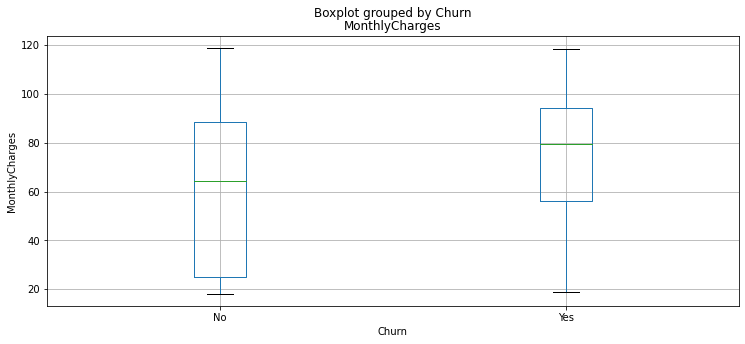

In [22]:
fig = plt.figure(figsize=(12,5))
ax = fig.gca()
df.boxplot(column='MonthlyCharges', by= 'Churn', ax =ax)
ax.set_ylabel('MonthlyCharges')
plt.show()

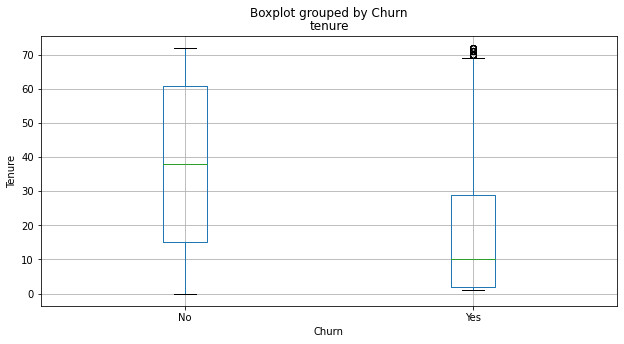

In [23]:
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()
df.boxplot(column = 'tenure', by = 'Churn', ax = ax)
ax.set_ylabel("Tenure")
plt.show()

##### Insights from our simple EDA:

We can see a difference between our target classes on tenure as you can see in the second boxplot, which is good because our model (Logistic Regression) may use this to separate the two classes.

There is also a slight difference between our target classes on monthly charges as shown in the first boxplot.

Before we start predicting, an important step to do is to convert our Churn feature, which is a string, into integer. Yes will be converted to 1 and No will be converted to 0. We will name this new columns a "class".

In [24]:
df['class'] = df['Churn'].apply(lambda x : 1 if x == "Yes" else 0)
# features will be saved as X and our target will be saved as y
X = df[['tenure','MonthlyCharges']].copy()
y = df['class'].copy()

In [25]:
df.shape

(7043, 22)

### Splitting data into train and test

In [27]:
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(5634, 2)
(1409, 2)


In [32]:
y_train.value_counts()

0    4133
1    1501
Name: class, dtype: int64

In [29]:
y_test.value_counts()

0    1041
1     368
Name: class, dtype: int64

### Fitting logistic regression on train data

In [33]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [35]:
# get the model coefficients

clf.coef_

array([[-0.05646728,  0.03315385]])

In [36]:
# get the intercept

clf.intercept_

array([-1.77408975])

### Evaluating the performance of the trained model

In [37]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [38]:
test_class_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7857649982250621
The accuracy on test data is  0.7735982966643009


### Get the confusion matrix for both train and test

[[3745  388]
 [ 819  682]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

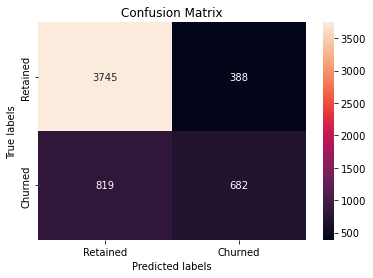

In [45]:

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='.0f') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[934 107]
 [212 156]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

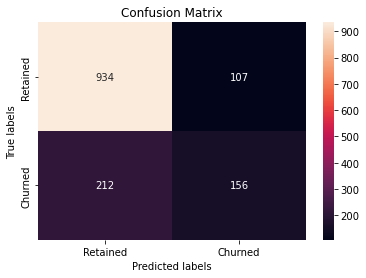

In [46]:
labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='.0f'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### Implementing Cross-validated Logistic Regression

In [49]:
logistic = LogisticRegression()

In [52]:
score = np.mean(cross_val_score(logistic,X_train,y_train,scoring='accuracy',cv=5))

In [54]:
score

0.7864785083081035